In [1]:
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

# Preprocessing and Data Analysis 💻

## First look at the data:

Training set:

In [2]:
# read in csv file as a DataFrame
tr_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
# explore the first 5 rows
tr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Testing set:

In [3]:
# read in csv file as a DataFrame
te_df = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
# explore the first 5 rows
te_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Size of each data set:

In [4]:
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


### Now the focus is shifted for the preprocessing of the training dataset.

In [5]:
#column information
tr_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#summary statistics
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#the Id column is not needed, let's drop it for both test and train datasets
tr_df.drop('Loan_ID',axis=1,inplace=True)
te_df.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


## Missing values 
As you can see we have some missing data, let's have a look how many we have for each column:

In [8]:
#missing values in decsending order
tr_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Each value will be replaced by the most frequent value (mode).

E.G. `Credit_History` has 50 null values and has 2 unique values `1.0` (475 times) or `0.0` (89 times) therefore each null value will be replaced by the mode `1.0` so now it will show in our data 525 times. 

In [9]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{tr_df[col].value_counts()}\n","-"*50)
    tr_df[col] = tr_df[col].fillna(
    tr_df[col].dropna().mode().values[0] )   

    
tr_df.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{tr_df[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      

## Data visalization 📊

Firstly we need to split our data to categorical and numerical data,


using the `.select_dtypes('dtype').columns.to_list()` combination.

## Loan status distribution

In [10]:
#list of all the columns.columns
#Cols = tr_df.tolist()
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  tr_df[num]
#categoric df
loan_cat = tr_df[cat]

Loan_Status
Y    422
N    192
Name: count, dtype: int64


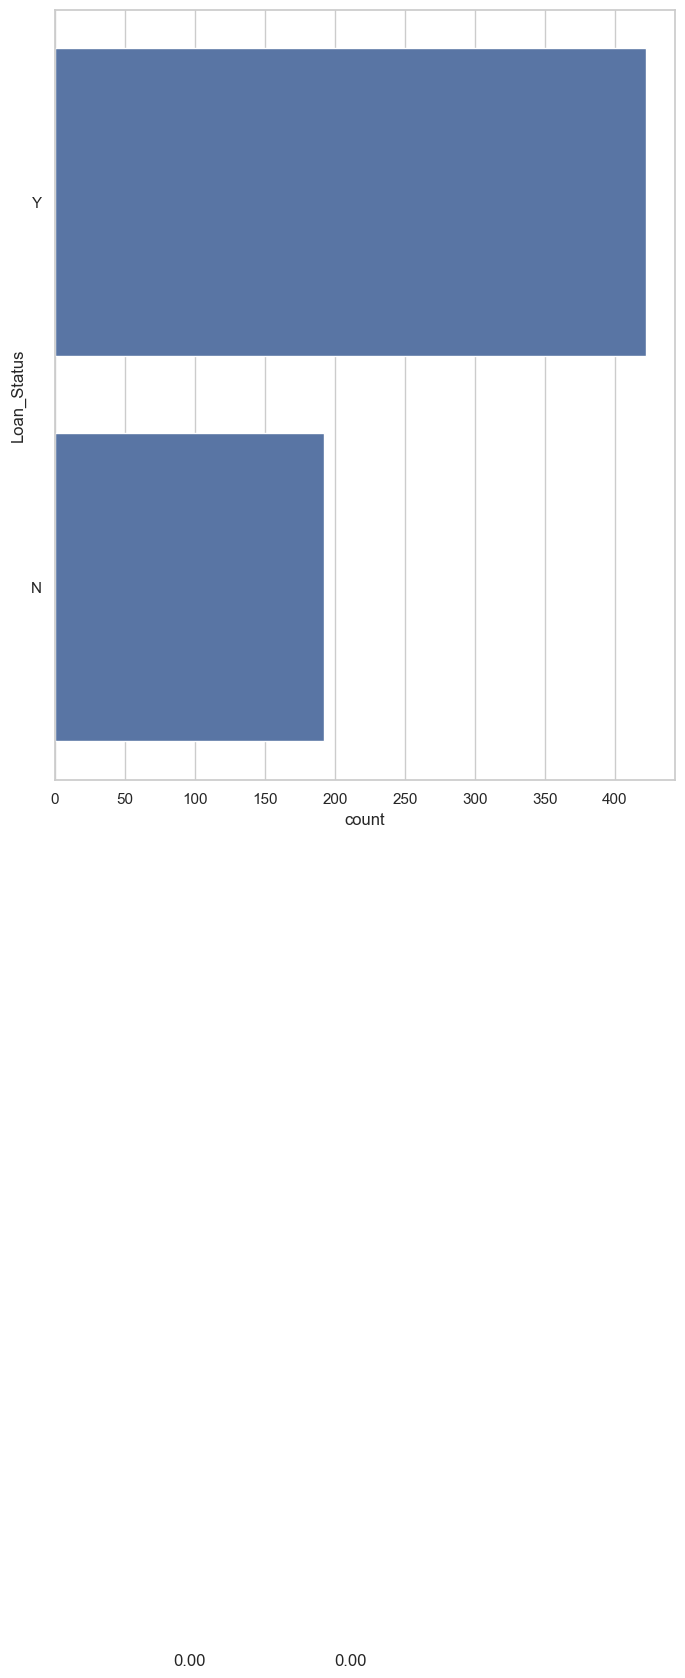

In [11]:
print(tr_df[cat[-1]].value_counts())
#tr_df[cat[-1]].hist(grid = False)

#print(i)
total = float(len(tr_df[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(tr_df[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

Let's plot our data

Numeric:

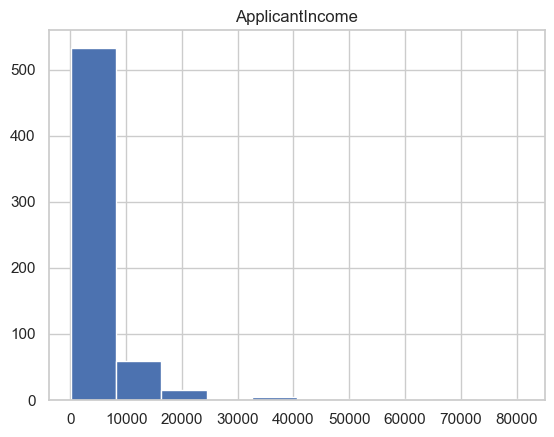

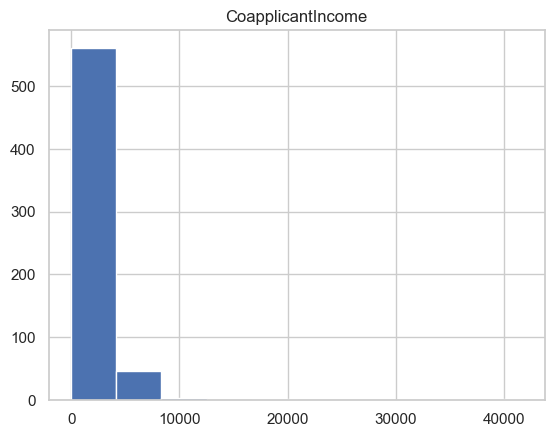

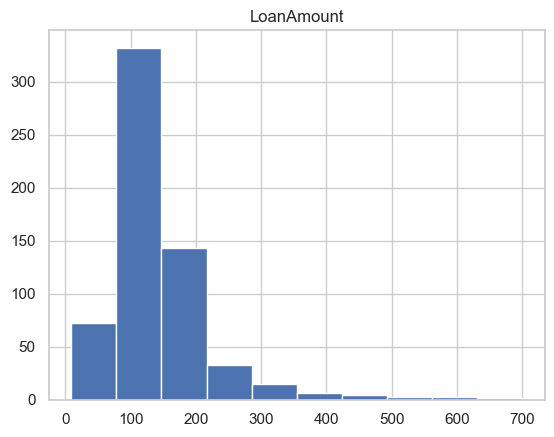

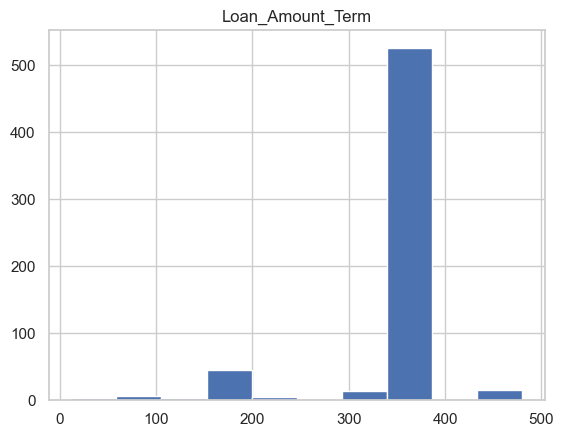

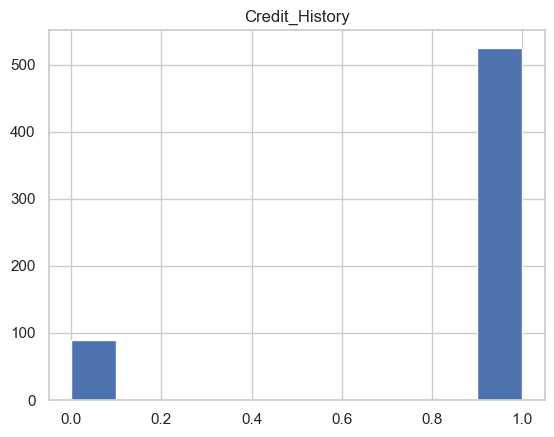

In [12]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()


Categorical (split by Loan status):

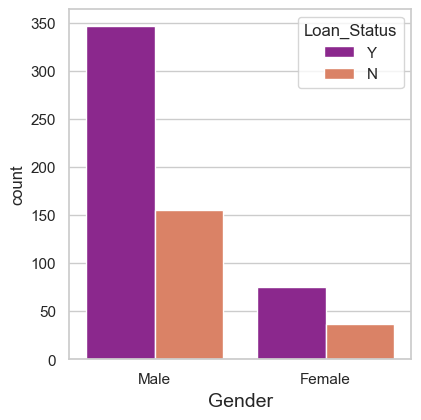

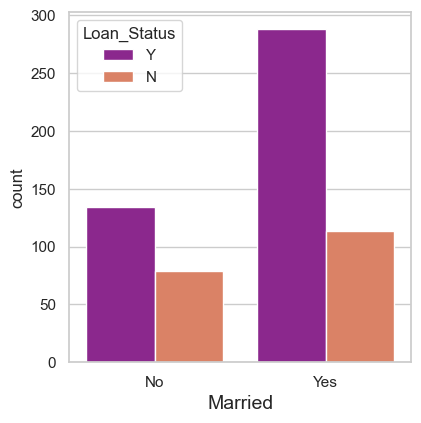

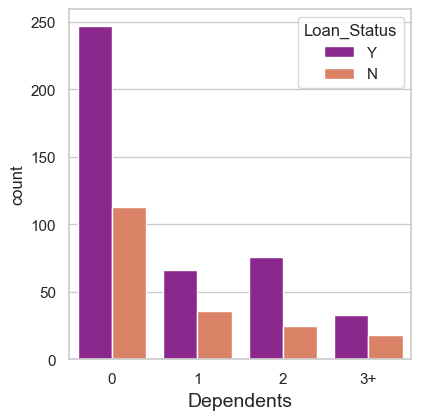

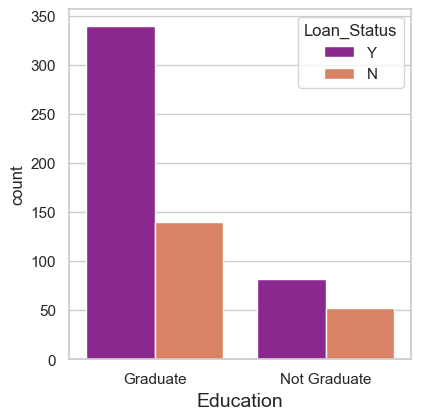

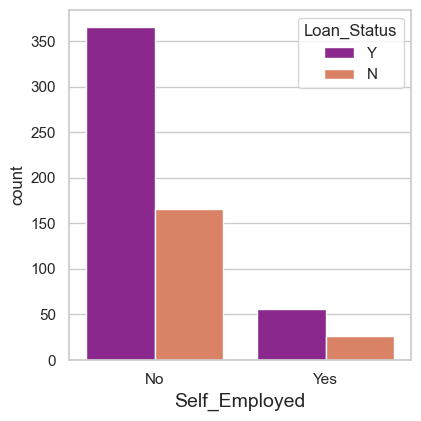

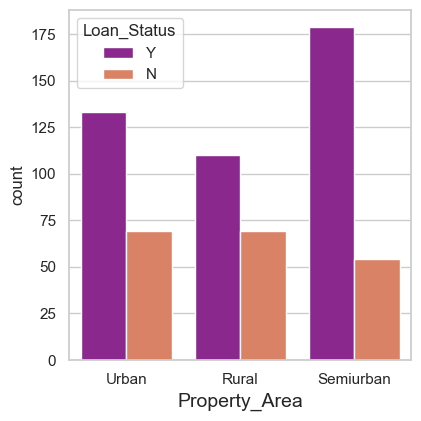

In [13]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=tr_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

## Encoding data to numeric

In [14]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
tr_df = tr_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
te_df = te_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(tr_df.Dependents)
Dependents__ = pd.to_numeric(te_df.Dependents)

# dropping the previous Dependents column
tr_df.drop(['Dependents'], axis = 1, inplace = True)
te_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
tr_df = pd.concat([tr_df, Dependents_], axis = 1)
te_df = pd.concat([te_df, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}\n")
print(tr_df.info(), "\n\n", te_df.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

## Correlation matrix 

<Axes: >

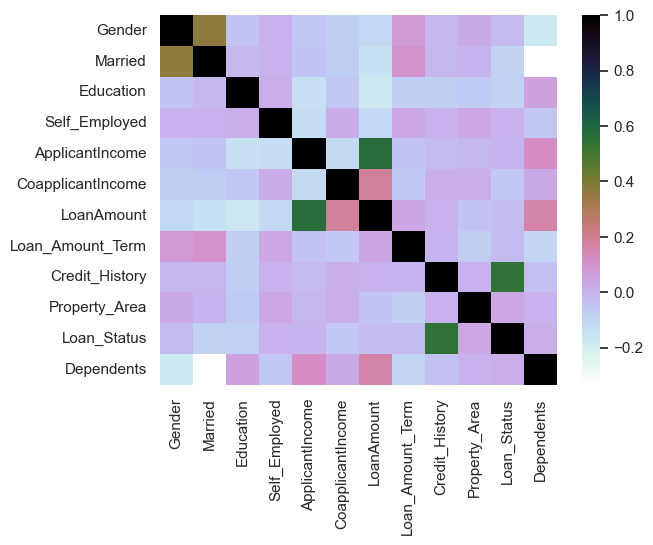

In [15]:
#plotting the correlation matrix
sns.heatmap(tr_df.corr() ,cmap='cubehelix_r')

### Correlation table for a more detailed analysis:

We can clearly see that `Credit_History` has the highest correlation with `Loan_Status` (a positive correlation of `0.54`).
Therefore our target value is highly dependant on this column.

# Machine learning models

First of all we will divide our dataset into two variables `X` as the features we defined earlier and `y` as the `Loan_Status` the target value we want to predict.

## Models we will use:

* **Decision Tree** 
* **Random Forest**
* **Logistic Regression**

## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Loan Status

4. Classification report by Loan Status

5. Overall accuracy


In [16]:
y = tr_df['Loan_Status']
X = tr_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Decision Tree


In [17]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.42      0.51      0.46        51
           1       0.80      0.73      0.76       134

    accuracy                           0.67       185
   macro avg       0.61      0.62      0.61       185
weighted avg       0.69      0.67      0.68       185

67.03% Accurate


### Csv results of the test for our model:



You can see each predition and true value side by side by the csv created in the output directory.

In [18]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Dection Tree.csv")     

## Random Forest


In [19]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.68      0.41      0.51        51
           1       0.81      0.93      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.77      0.78      0.76       185

78.38% Accurate


### Csv results of the test for our model:


You can see each predition and true value side by side by the csv created in the output directory.

In [20]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv")     

## Logistic Regression

In [21]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

accuracy is 0.8324324324324325


In [22]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")     

### Csv results of the test for our model:


# Conclusion

1. `Credit_History` is a very important variable  because of its high correlation with `Loan_Status` therefor showind high Dependancy for the latter.
2. The Logistic Regression algorithm is the most accurate: **approximately 83%**.

In [23]:
score = [DT_SC,RF_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,Logistic Regression,0.832432
1,Random Forest,0.783784
0,Decision Tree,0.670270


### END of NOTEBOOK

#### Edited by Aryan Dhone
https://linkedin.com/in/aryandhone555
er.aryandhone@gmail.com